**0.0-test.ipynb** for testing your `lvv-ri` environment

Copyright (c) 2019, Arvid Lundervold

# python, numpy, pandas, matplotlib, rpy2 and more

If you successfully run through this notebook, then your Python environment is configured correctly. 

# How to use the Jupyter Notebook?

[Jupyter Notebook](http://jupyter.org/) is a useful tool for experimenting with code. Everything of code and text is written in HTML, Markdown and Python.

Use arrow keys to navigate between cells. Hit ENTER on a cell to switch to editing mode. ESC to get back.

In [124]:
print("This is a Jupyter cell containing Python code. Hit 'Run' in the menu to execute the cell. ")

This is a Jupyter cell containing Python code. Hit 'Run' in the menu to execute the cell. 


You can also run cells by typing **Shift+Enter** or **Ctrl+Enter**. Try running the cell above by using both of these.

You will find more information via the Help menu above.

`lvv-ri` is using Jupyter Notebooks with both Python and R for the coding. <br>Here is a good tutorial on Jupyter Notebook: [Jupyter Notebook Tutorial: The Definitive Guide](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook).

# Import libraries

These are libaries that will be frequently used in the course:

In [125]:
# To diosplay plots directly in the notebook:
%matplotlib inline

In [126]:
# A frequently used plotting libraryp:
import matplotlib
import matplotlib.pyplot as plt

In [127]:
# An extension of matplotlib making it easy to generate even nicer plots:
import seaborn as sns

In [128]:
# A numerical libray for efficient manipulation of matrices (and more):
import numpy as np

In [129]:
# To read, write and proecess tabular data:
import pandas as pd

In [130]:
# For machine learning:
import sklearn

In [131]:
# For using R:
import rpy2
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
from rpy2.robjects.lib.tidyr import DataFrame

If errors like<br>
```python
RRuntimeError: Error in loadNamespace(name) : there is no package called 'tidyr'
```
see cell below:

In [132]:
from rpy2.robjects.packages import importr
utils = importr('utils')
# If needed to install - uncomment the following
#utils.install_packages('tidyr')
#utils.install_packages('lazyeval')
#utils.install_packages('lme4')
#utils.install_packages('ggplot2')
#utils.install_packages('GGally')
#utils.install_packages('foreign')

# Extra:
#utils.install_packages('caret')
#utils.install_packages('tidyverse')
#utils.install_packages('devtools')
#utils.install_packages('rlang')
#utils.install_packages('Rccp')
#utils.install_packages('tikzDevice')
#utils.install_packages('stargazer')
#utils.install_packages('readxl')
#utils.install_packages('stringi')
#utils.install_packages('r-cran-stringi')
#utils.install_packages('foreign')

In [133]:
%reload_ext rpy2.ipython

In [134]:
%R R.version$system

array(['x86_64, mingw32'], dtype='<U15')

In [135]:
%R R.version$version.str

array(['R version 3.4.1 (2017-06-30)'], dtype='<U28')

In [136]:
%R library(foreign); #library(readxl)

# Test libraries

**REMARK:**  The aim of the following is to test the installation, not doing relevant `lvv-ri`analysis.

## `Numpy`

In [137]:
import numpy as np

In [138]:
a = np.array([1, 2, 3])
print(type(a))

<class 'numpy.ndarray'>


In [139]:
e = np.random.random((3,3))
e

array([[0.58569298, 0.97146617, 0.82016551],
       [0.3005846 , 0.19725929, 0.29212021],
       [0.23741048, 0.7085699 , 0.33260982]])

## `matplotlib`: a simple plot

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt

The following will give a figure displaying a sine function:

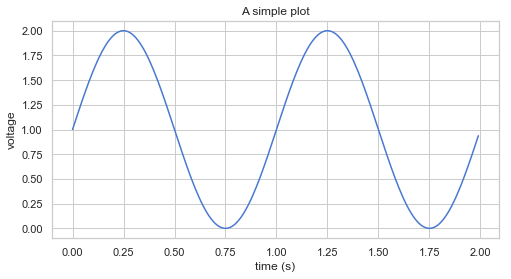

In [141]:
# Data to be plotted (generated by Numpy)
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Make a figure of given size
f, ax = plt.subplots(figsize=(8,4))

# Plot t versus s
plt.plot(t, s)

# Add a title and labels:
plt.title('A simple plot')
plt.xlabel('time (s)')
plt.ylabel('voltage')

# Show plot:
plt.show()

## `Seaborn`: a more advanced plot

In [142]:
import seaborn as sns

Source: [Link](https://seaborn.pydata.org/examples/scatterplot_categorical.html)

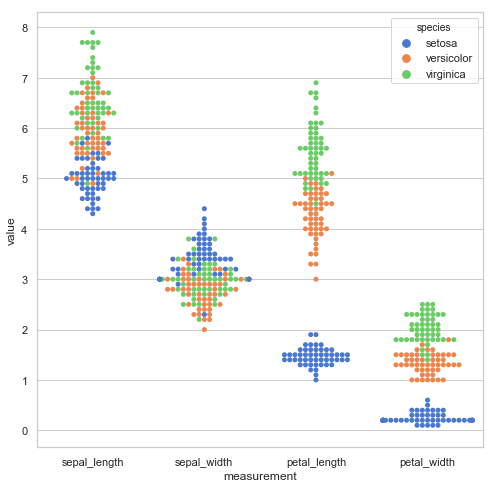

In [143]:
sns.set(style="whitegrid", palette="muted")

# Load the iris dataset
iris = sns.load_dataset("iris")

# "Melt" dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Make a figure with given size
f, ax = plt.subplots(figsize=(8,8))

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris, size=5, ax=ax)

plt.show()

## `Pandas`

In [144]:
import pandas as pd

In [147]:
df = pd.read_csv('../data/lvv_ri_data.csv')

In [148]:
df.head()

,Subject,Sex,AcquisitionYearsW1,AcquisitionYearsW2,AcquisitionYearsW3,Left-Lateral-Ventricle_W1,Left-Lateral-Ventricle_W2,Left-Lateral-Ventricle_W3,Right-Lateral-Ventricle_W1,Right-Lateral-Ventricle_W2,Right-Lateral-Ventricle_W3,EstimatedTotalIntraCranialVol_W3,Stroop_3_R_W3
0,subj_01,F,56.63,60.35,62.62,5321.4,5063.6,5368.3,6855.2,6729.2,7233.2,1.232679e+06,66.0
1,subj_02,M,49.07,52.58,55.05,11038.6,11912.2,12313.3,10611.6,11774.8,12070.5,1.464692e+06,85.0
2,subj_03,M,74.61,78.14,80.59,29718.4,32265.1,35887.0,34241.0,37155.2,41221.4,1.385841e+06,71.0
3,subj_04,M,56.23,59.78,62.68,21830.1,23933.6,26164.2,15243.9,16505.1,18509.1,1.529445e+06,41.0
4,subj_05,M,63.22,67.00,69.53,17205.1,16970.1,15858.1,13962.1,13755.5,13143.9,1.371460e+06,62.0


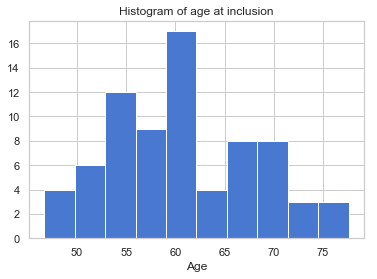

In [149]:
df['AcquisitionYearsW1'].hist()
plt.title("Histogram of age at inclusion")
plt.xlabel("Age")
plt.show()

## `scikit-learn`: machine learning

In [150]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [151]:
data = datasets.load_breast_cancer()

In [152]:
X = data['data']
y = data['target']
features = data['feature_names']
labels = data['target_names']

In [153]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [154]:
print(labels)

['malignant' 'benign']


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [156]:
rf = RandomForestClassifier(n_estimators=100)

In [157]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [158]:
predictions = rf.predict(X_test)

In [159]:
accuracy_score(y_test, predictions) * 100

93.00699300699301

## `rpy2`, `lmer` and `ggplot`: Analysis in R

In [160]:
%%R

# library(foreign)

Rdf <- read.csv(file="../data/lvv_ri_data.csv",head=TRUE, sep=",")

In [161]:
%R names(Rdf)

array(['Subject', 'Sex', 'AcquisitionYearsW1', 'AcquisitionYearsW2',
       'AcquisitionYearsW3', 'Left.Lateral.Ventricle_W1',
       'Left.Lateral.Ventricle_W2', 'Left.Lateral.Ventricle_W3',
       'Right.Lateral.Ventricle_W1', 'Right.Lateral.Ventricle_W2',
       'Right.Lateral.Ventricle_W3', 'EstimatedTotalIntraCranialVol_W3',
       'Stroop_3_R_W3'], dtype='<U32')

In [162]:
%R dim(Rdf)

array([74, 13], dtype=int32)

In [183]:
%R Rdf$Stroop_3_R_W3

array([ 66.,  85.,  71.,  41.,  62.,  89.,  46.,  57.,  48.,  50.,  59.,
        56.,  40.,  51.,  57.,  54.,  52.,  78.,  54.,  53.,  47.,  46.,
        45.,  41.,  57.,  71.,  73.,  41.,  57.,  56., 102.,  78.,  68.,
        60.,  48.,  39.,  41.,  55.,  55.,  57.,  42.,  44.,  55.,  51.,
        51.,  50.,  44.,  66.,  65.,  63.,  59.,  60.,  54.,  41.,  94.,
        78.,  49.,  80.,  51.,  42.,  88.,  58.,  83.,  60.,  51.,  45.,
        44.,  45.,  50.,  35.,  42.,  42.,  55.,  74.])

In [184]:
%R mean(Rdf$Left.Lateral.Ventricle_W1)

array([14994.0972973])

In [185]:
%R sd(Rdf$Left.Lateral.Ventricle_W1)

array([8584.6772172])

In [186]:
%R min(Rdf$AcquisitionYearsW1)

array([46.66])

In [187]:
%R max(Rdf$AcquisitionYearsW1)

array([77.63])

In [173]:
%%R

RdfS <- na.omit(Rdf, select=c(Subject, Stroop_3_R_W3, Left.Lateral.Ventricle_W1, Left.Lateral.Ventricle_W2, Left.Lateral.Ventricle_W3))
RfitLVV <- lm(Stroop_3_R_W3 ~ Left.Lateral.Ventricle_W1 + Left.Lateral.Ventricle_W2 + Left.Lateral.Ventricle_W3, data=RdfS)

In [174]:
%R names(RdfSdf)

array(['Subject', 'Sex', 'AcquisitionYearsW1', 'AcquisitionYearsW2',
       'AcquisitionYearsW3', 'Left.Lateral.Ventricle_W1',
       'Left.Lateral.Ventricle_W2', 'Left.Lateral.Ventricle_W3',
       'Right.Lateral.Ventricle_W1', 'Right.Lateral.Ventricle_W2',
       'Right.Lateral.Ventricle_W3', 'EstimatedTotalIntraCranialVol_W3',
       'Stroop_3_R_W3'], dtype='<U32')

In [176]:
%R head(RfitLVV)

R object with classes: ('list',) mapped to:
<ListVector - Python:0x000002BD58573448 / R:0x000002BD624738A8>
[Float..., Float..., Float..., IntVe..., Float..., IntVe...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD56F2DB88 / R:0x000002BD6363A268>
[52.349909, 0.001122, -0.007949, 0.006735]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD5DF70708 / R:0x000002BD620D5E38>
[11.773199, 32.021743, 0.073029, -21.817724, ..., -11.487475, -12.203326, -1.590332, 11.706603]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD5855BFC8 / R:0x000002BD620D60B8>
[-490.216293, 23.385087, 4.041654, -52.526447, ..., -14.886548, -15.719566, -3.260121, 12.650482]
  rank: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000002BD5855B8C8 / R:0x000002BD5C1DAE50>
[4]
  fitted.values: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD5855BB08 / R:0x000002BD5C7D2120>
[54.226801, 52.978257, 70.926971, 62.817724, ..., 53.487475, 54.203326, 56.590332, 62.293397]
  assign: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000002BD609FC688 / R:0x000002BD5CDD5338>
[0, 1, 2, 3]

In [195]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

pd_RfitLVV = r['RfitLVV']

temp = pandas2ri.ri2py(pd_RfitLVV)
print(temp[0])
#print(temp[1])
#print(temp[2])
print(temp[3])
#print(temp[4])
#print(temp[5])
#print(temp[6])
#print(temp[7])
#print(temp[8])

              (Intercept) Left.Lateral.Ventricle_W1 Left.Lateral.Ventricle_W2 

             52.349908701               0.001121977              -0.007949177 

Left.Lateral.Ventricle_W3 

              0.006735438 

[1] 4



In [197]:
print(pd_RfitLVV.names)
print(pandas2ri.ri2py(pd_RfitLVV.names))

 [1] "coefficients"  "residuals"     "effects"       "rank"         

 [5] "fitted.values" "assign"        "qr"            "df.residual"  

 [9] "xlevels"       "call"          "terms"         "model"        

['coefficients' 'residuals' 'effects' 'rank' 'fitted.values' 'assign' 'qr'
 'df.residual' 'xlevels' 'call' 'terms' 'model']


In [179]:
%R summary(RfitLVV)

R object with classes: ('summary.lm',) mapped to:
<ListVector - Python:0x000002BD57109248 / R:0x000002BD5C9EDCD8>
[Vector, Formula, FloatVector, Matrix, ..., FloatVector, FloatVector, FloatVector, Matrix]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x000002BD6067F2C8 / R:0x000002BD5C3DCE20>
[RObject, Vector, RObject]
  terms: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x000002BD60665E08 / R:0x000002BD5C353728>
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD585732C8 / R:0x000002BD620D5E38>
[11.773199, 32.021743, 0.073029, -21.817724, ..., -11.487475, -12.203326, -1.590332, 11.706603]
  coefficients: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x000002BD609DFA08 / R:0x000002BD5C9ED670>
[52.349909, 0.001122, -0.007949, 0.006735, ..., 0.000000, 0.426450, 0.001510, 0.000144]
...
  sigma: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD5DF707C8 / R:0x000002BD5C6C4DD0>
[0.217580]
  df: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD5DF70788 / R:0x000002BD5C6C4DA0>
[0.184048]
  r.squared: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD58562748 / R:0x000002BD5D1C46E8>
[6.488669, 3.000000, 70.000000]
  adj.r.squared: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x000002BD58562648 / R:0x000002BD5C9EEA78>
[0.055522, -0.000004, 0.000001, 0.000000, ..., 0.000000, 0.000000, -0.000000, 0.000000]

In [181]:
%R anova(RfitLVV)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
0,1,546.862290,546.862290,3.204246,0.077772
1,1,16.334967,16.334967,0.095712,0.757956
2,1,2759.027640,2759.027640,16.166049,0.000144
3,70,11946.761588,170.668023,NaN,NaN


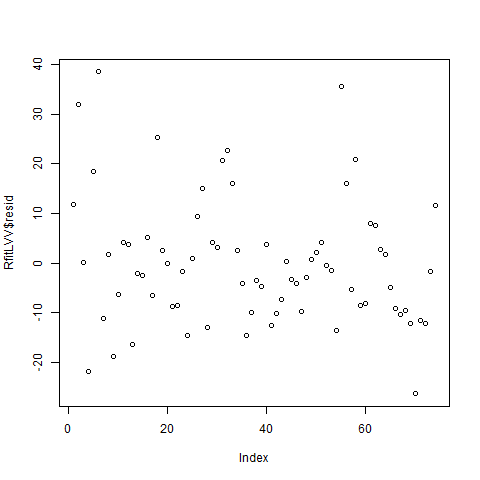

In [91]:
%R plot(RfitLVV$resid)

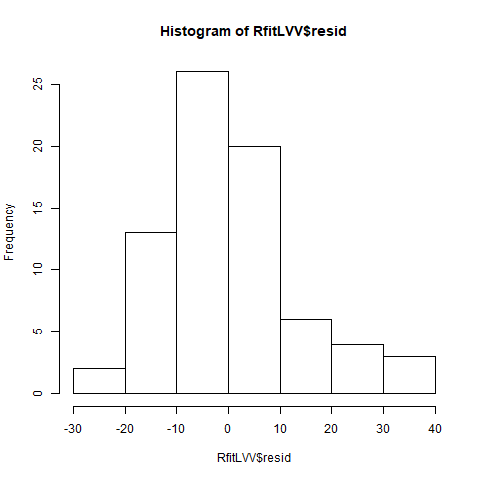

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x000002BD5DCA9508 / R:0x000002BD63657420>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD5DCB8588 / R:0x000002BD62328508>
[-30.000000, -20.000000, -10.000000, 0.000000, 10.000000, 20.000000, 30.000000, 40.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000002BD606655C8 / R:0x000002BD63001698>
[2, 13, 26, 20, 6, 4, 3]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD5E05E088 / R:0x000002BD62E0F480>
[0.002703, 0.017568, 0.035135, 0.027027, 0.008108, 0.005405, 0.004054]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002BD60665608 / R:0x000002BD62E0F2E0>
[-25.000000, -15.000000, -5.000000, 5.000000, 15.000000, 25.000000, 35.000000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000002BD5E063648 / R:0x000002BD62FE1D38>
['RfitLVV$resid']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x000002BD5E061688 / R:0x000002BD56DF0F20>
[       1]

In [92]:
%R hist(RfitLVV$resid)


A group of diagnostic plots (residual, qq, scale-location, leverage) to assess model performance when applied to a fitted linear regression model.

https://data.library.virginia.edu/diagnostic-plots/

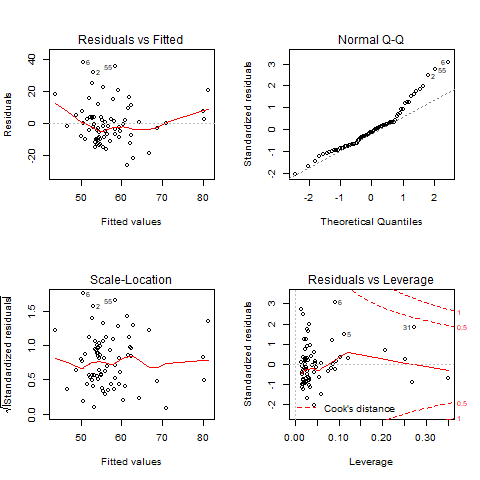

In [198]:
%R par(mfrow=c(2,2));  plot(RfitLVV)  # Plot four panels on the same figure

In [199]:
df = pd.read_csv('../data/lvv_ri_data.csv')
df.head(7).T

,0,1,2,3,4,5,6
Subject,subj_01,subj_02,subj_03,subj_04,subj_05,subj_06,subj_07
Sex,F,M,M,M,M,F,M
AcquisitionYearsW1,56.63,49.07,74.61,56.23,63.22,60.51,58.87
AcquisitionYearsW2,60.35,52.58,78.14,59.78,67,64.29,62.42
AcquisitionYearsW3,62.62,55.05,80.59,62.68,69.53,66.82,64.87
Left-Lateral-Ventricle_W1,5321.4,11038.6,29718.4,21830.1,17205.1,14800.4,19864.5
Left-Lateral-Ventricle_W2,5063.6,11912.2,32265.1,23933.6,16970.1,18814.5,20962.8
Left-Lateral-Ventricle_W3,5368.3,12313.3,35887,26164.2,15858.1,19464.2,22141.1
Right-Lateral-Ventricle_W1,6855.2,10611.6,34241,15243.9,13962.1,12281.2,12133.7
Right-Lateral-Ventricle_W2,6729.2,11774.8,37155.2,16505.1,13755.5,16135.2,13055.5


Reading a Pandas dataframe (df) into R (data)

In [200]:
%%R -i df

data = df

In [201]:
%R names(data)

array(['Subject', 'Sex', 'AcquisitionYearsW1', 'AcquisitionYearsW2',
       'AcquisitionYearsW3', 'Left.Lateral.Ventricle_W1',
       'Left.Lateral.Ventricle_W2', 'Left.Lateral.Ventricle_W3',
       'Right.Lateral.Ventricle_W1', 'Right.Lateral.Ventricle_W2',
       'Right.Lateral.Ventricle_W3', 'EstimatedTotalIntraCranialVol_W3',
       'Stroop_3_R_W3'], dtype='<U32')

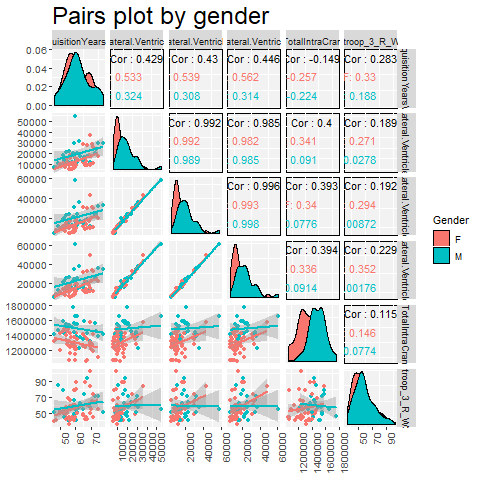

In [202]:
%%R -i df

library(ggplot2)
library(GGally)

data = df
data$Gender = data$Sex

pm <- ggpairs(
    data, mapping = aes(color = Gender), 
    title = "Pairs plot by gender",
    legend = 1,
    columns = c('AcquisitionYearsW1',
                'Left.Lateral.Ventricle_W1',
                'Left.Lateral.Ventricle_W2', 
                'Left.Lateral.Ventricle_W3', 
                'EstimatedTotalIntraCranialVol_W3', 
                'Stroop_3_R_W3'),
  lower = list(
    continuous = 'smooth'
  ))   


pm = pm + theme(axis.text.x = element_text(angle = 90, hjust = 1))

pm = pm + theme(
  axis.text = element_text(size = 10),
  axis.title = element_text(size = 10),
  legend.background = element_rect(fill = "white"),
  panel.grid.major = element_line(colour = NA),
#  panel.grid.minor = element_blank(),
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid', colour = "white"),
  panel.background = element_rect(fill = "grey95"),
  plot.title = element_text(size=24)
)

print(pm)

Converting the R dataframes to Pandas DataFrames using `rpy2` <br>

In [189]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

pd_data = r['data']

In [191]:
pd_data.head().T

,0,1,2,3,4
Subject,subj_01,subj_02,subj_03,subj_04,subj_05
Sex,F,M,M,M,M
AcquisitionYearsW1,56.63,49.07,74.61,56.23,63.22
AcquisitionYearsW2,60.35,52.58,78.14,59.78,67
AcquisitionYearsW3,62.62,55.05,80.59,62.68,69.53
Left.Lateral.Ventricle_W1,5321.4,11038.6,29718.4,21830.1,17205.1
Left.Lateral.Ventricle_W2,5063.6,11912.2,32265.1,23933.6,16970.1
Left.Lateral.Ventricle_W3,5368.3,12313.3,35887,26164.2,15858.1
Right.Lateral.Ventricle_W1,6855.2,10611.6,34241,15243.9,13962.1
Right.Lateral.Ventricle_W2,6729.2,11774.8,37155.2,16505.1,13755.5
